#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 03
**Simulating the density function (histograms) of theoretical distributions**

no actual dataset is used

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format, scientific_format
from plotnine import *
import seaborn as sns
from matplotlib.ticker import PercentFormatter, ScalarFormatter
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
output = dirname + "da_case_studies/ch03-simulations/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)

In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)

In [4]:
obs = 100000

Set random seed globally here

In [5]:
rng = np.random.default_rng(16460)

In [6]:
# Bernoulli
bernoulli = pd.DataFrame(rng.binomial(1, 0.7, obs), columns=["bernoulli"])

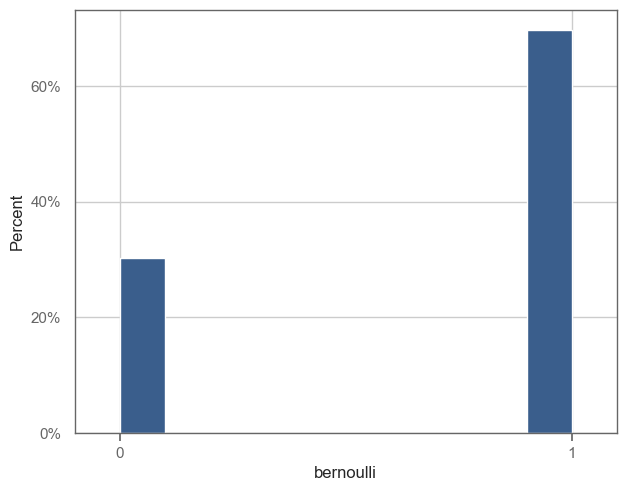

In [7]:
sns.histplot(
    data=bernoulli,
    x="bernoulli",
    stat='probability',
    binwidth=0.1,
    color=da.color[0],
    edgecolor="white",
    alpha=1

)

plt.xlabel("bernoulli")
plt.ylabel("Percent")
plt.xlim(-0.1, 1.1)
plt.xticks(ticks=np.arange(0, 2, 1))  
plt.yticks(ticks=np.arange(0, 0.7, 0.2))  
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  
plt.show()

In [8]:
# Binomial
# with smaller sample
Nbinom = 20

binomial = pd.DataFrame(rng.binomial(Nbinom, 0.4, obs), columns=["binomial"])

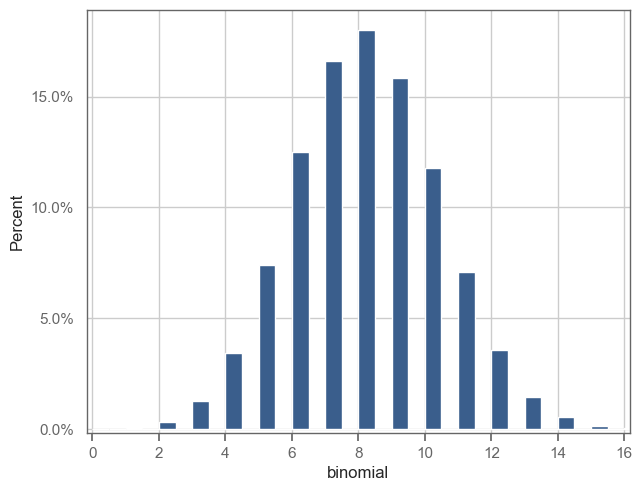

In [9]:
sns.histplot(
    data=binomial,
    x="binomial",
    stat='probability',
    binwidth=0.5,
    color=da.color[0],
    edgecolor="white",
    alpha = 1
)

plt.xlabel("binomial")
plt.ylabel("Percent")
plt.xlim(0, 16)
plt.xticks(ticks=np.arange(0, 17, 2))  
plt.yticks(ticks=np.arange(0, 0.17, 0.05)) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  
plt.gca().set_xlim(left=0 - 0.01 * (16 - 0), right=16 + 0.01 * (16 - 0)) 
plt.gca().set_ylim(bottom=0 - 0.01 * plt.gca().get_ylim()[1])  
plt.show()

In [10]:
# uniform
uniform = pd.DataFrame(rng.uniform(0, 1, obs), columns=["uniform"])

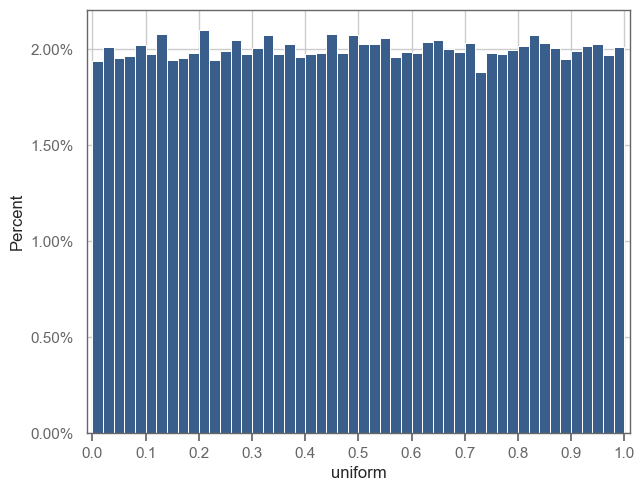

<Figure size 1000x600 with 0 Axes>

In [11]:
sns.histplot(
    data=uniform,
    x="uniform",
    stat='probability',
    bins=50,  
    color=da.color[0],
    edgecolor="white",
    alpha=1,
)

plt.xlabel("uniform")
plt.ylabel("Percent")
plt.xlim(0, 1)
plt.xticks(ticks=np.arange(0, 1.1, 0.1))  
plt.yticks(ticks=np.arange(0, 0.021, 0.005))  
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  
plt.gca().set_xlim(left=0 - 0.01, right=1 + 0.01) 
plt.gca().set_ylim(bottom=0 - 0.001 * plt.gca().get_ylim()[1])
plt.figure(figsize=(10, 6))
plt.show()

In [12]:
# normal
normal = pd.DataFrame(rng.normal(0, 1, obs), columns=["normal"])

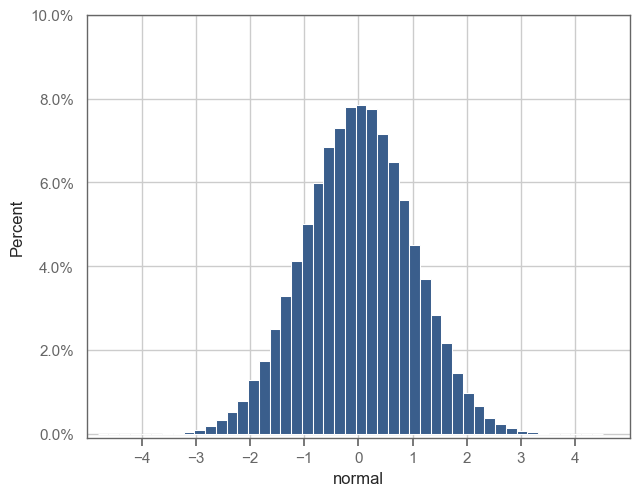

In [13]:
sns.histplot(
    data=normal,
    x="normal",
    stat="probability",
    binwidth=0.2,  
    color=da.color[0],
    edgecolor="white",
    alpha=1,
)

plt.xlabel("normal")
plt.ylabel("Percent")
plt.xlim(-5, 5)
plt.ylim(0, 0.1)
plt.xticks(ticks=np.arange(-4, 5, 1))  
plt.yticks(ticks=np.arange(0, 0.11, 0.02))  
plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 
plt.gca().set_xlim(left=-5 - 0.01, right=5 + 0.01) 
plt.gca().set_ylim(bottom=0 - 0.001)
plt.show()

In [14]:
# lognoromal
# take the exponential of the randomly generated normal above
lognormal = pd.DataFrame(np.exp(normal["normal"]).values, columns=["lognormal"])

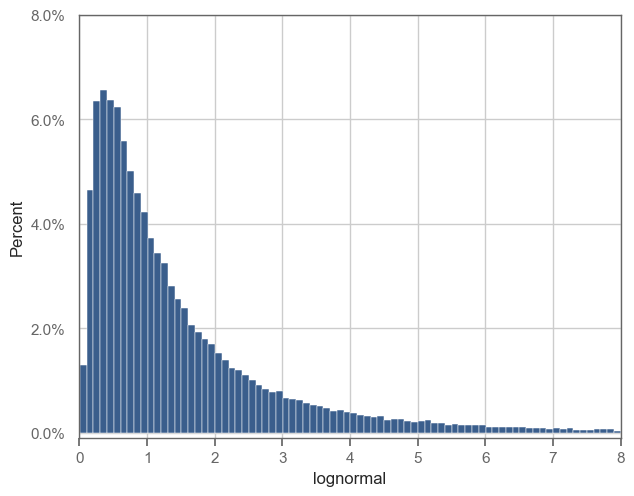

In [15]:
filtered_lognormal = lognormal.query("lognormal < 10")

sns.histplot(
    data=filtered_lognormal,
    x="lognormal",
    stat="probability",
    binwidth=0.1,  
    color=da.color[0],
    edgecolor="white",
    alpha=1,
)

plt.xlabel("lognormal")
plt.ylabel("Percent")
plt.xlim(0, 8)
plt.ylim(0, 0.08)
plt.xticks(ticks=np.arange(0, 9, 1)) 
plt.yticks(ticks=np.arange(0, 0.09, 0.02)) 
plt.gca().yaxis.set_major_formatter(PercentFormatter(1)) 
plt.gca().set_xlim(left=0 - 0.01, right=8 + 0.01)
plt.gca().set_ylim(bottom=0 - 0.001) 
plt.show()

In [16]:
# power-law
alpha = 3
xmin = 1
x = da.seq(1, obs, 1)
X = np.power(x, float(-alpha))
powerlaw = xmin * X
histrange = np.quantile(powerlaw, 0.75)
powerlaw = powerlaw / sum(powerlaw)
powerlaw = pd.DataFrame(powerlaw, columns=["powerlaw"])

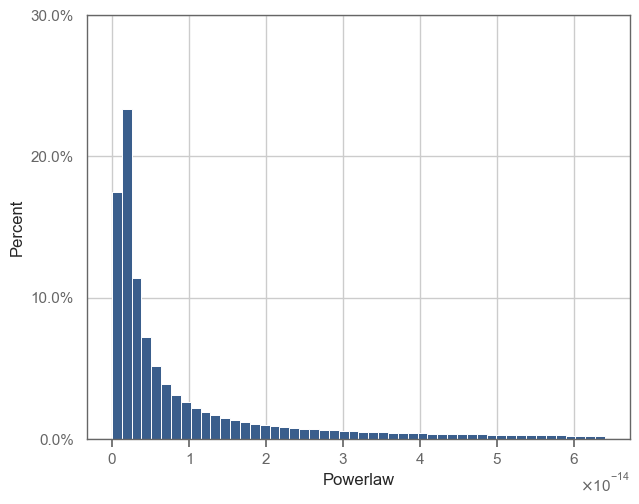

In [17]:
filtered_powerlaw = powerlaw.query("powerlaw < @histrange")

sns.histplot(
    data=filtered_powerlaw,
    x="powerlaw",
    stat="probability",
    bins=50,  
    binrange=(0, histrange), 
    color=da.color[0],
    edgecolor="white",
    alpha=1,
)
plt.xlabel("Powerlaw")
plt.ylabel("Percent")
plt.ylim(0, 0.3)
plt.yticks(ticks=np.arange(0, 0.31, 0.1))  
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))  
plt.gca().xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
plt.show()